In [20]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array

##### a. Load in a pre-trained CNN model trained on a large dataset

In [3]:
resnet50 = ResNet50()

In [53]:
img = load_img('snk.jpg', target_size=(224,224))

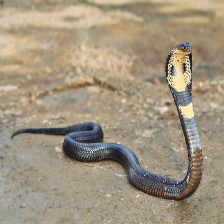

In [54]:
img

In [55]:
img = img_to_array(img)

In [56]:
img = img.reshape(1, 224,224,3)

In [57]:
img.shape

(1, 224, 224, 3)

In [58]:
img = preprocess_input(img)

In [59]:
pred = resnet50.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [60]:
pred;

In [61]:
decode_predictions(pred)

[[('n01748264', 'Indian_cobra', 0.92499024),
  ('n01728920', 'ringneck_snake', 0.04664093),
  ('n01737021', 'water_snake', 0.011375079),
  ('n01740131', 'night_snake', 0.006452707),
  ('n01751748', 'sea_snake', 0.0030246573)]]

##### b. Freeze parameters (weights) in model’s lower convolutional layers

In [64]:
from keras.utils import plot_model

In [66]:
plot_model(resnet50, show_layer_names=True, show_trainable=True)

In [67]:
resnet50.trainable

True

In [68]:
labels = ['airplane','automobile','bird','cat','deer','dog',
          'frog','horse','ship','truck']

In [70]:
resnet50 = ResNet50(include_top=False, input_shape=(32, 32, 3))

In [71]:
from keras.layers import Flatten, Dense

##### c. Add custom classifier with several layers of trainable parameters to model

In [72]:
#Flatten output layer of Resnet
flattened = Flatten()(resnet50.output)

#Fully connected layer 1
fc1 = Dense(128, activation='relu', name="AddedDense1")(flattened)

#Fully connected layer, output layer
fc2 = Dense(10, activation='softmax', name="AddedDense2")(fc1)

In [73]:
resnet50.trainable = False

In [75]:
from keras.models import Model

In [76]:
model = Model(inputs=resnet50.inputs, outputs=fc2)

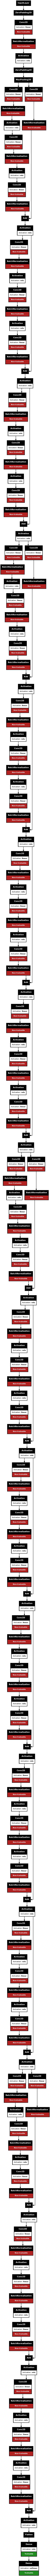

In [85]:
plot_model(model, show_layer_activations=True, show_trainable=True)

In [86]:
from keras.datasets import cifar10

In [87]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

##### d. Train classifier layers on training data available for task

In [88]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [89]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2


/home/mitu/.local/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_529']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 92ms/step - accuracy: 0.4973 - loss: 1.5098
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.6245 - loss: 1.0670


##### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [ ]:
flattened = Flatten()(resnet50.output)
fc1 = Dense(128, activation='relu', name="AddedDense1")(flattened)
fc2 = Dense(64, activation='relu', name="AddedDense2")(fc1)
fc3 = Dense(10, activation='softmax', name="AddedDense3")(fc2)

resnet50.trainable = False
model = Model(inputs=resnet50.inputs, outputs=fc3)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2)

Epoch 1/2
 836/1563 ━━━━━━━━━━━━━━━━━━━━ 1:07 92ms/step - accuracy: 0.4416 - loss: 1.6515